In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
torch.manual_seed(0)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
import chardet

# Read a sample of the file to detect encoding
with open('somervilledata.csv', 'rb') as file:
    result = chardet.detect(file.read(10000))  # Read the first 10000 bytes

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

Detected encoding: UTF-16


In [5]:
data  = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding='UTF-16')
data

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
138,0,5,3,3,1,3,5
139,1,5,2,3,4,2,5
140,1,5,3,3,4,4,5
141,0,4,3,3,4,4,5


In [13]:
x = torch.Tensor(data.iloc[:,1:].values).float().to(device)
x
y = torch.Tensor(data.iloc[:,:1].values).float().to(device)
y

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
      

In [7]:
model = nn.Sequential(nn.Linear(6,1), nn.Sigmoid()).to(device)
model

Sequential(
  (0): Linear(in_features=6, out_features=1, bias=True)
  (1): Sigmoid()
)

In [8]:
lossfunc = torch.nn.MSELoss()
lossfunc

MSELoss()

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [10]:
losses = []
for i in range(1000):
    y_pred = model(x)
    loss = lossfunc(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i%5 == 0:
        print(i, loss.item())

0 0.4104820787906647
5 0.30545225739479065
10 0.26369374990463257
15 0.27913498878479004
20 0.2718641757965088
25 0.26045137643814087
30 0.26216235756874084
35 0.2600038945674896
40 0.25639626383781433
45 0.2559449374675751
50 0.2539243996143341
55 0.252429336309433
60 0.251277893781662
65 0.24984954297542572
70 0.2487950623035431
75 0.2476600706577301
80 0.24669502675533295
85 0.24577470123767853
90 0.24494458734989166
95 0.24418437480926514
100 0.24349142611026764
105 0.2428613156080246
110 0.2422860711812973
115 0.24176163971424103
120 0.24128152430057526
125 0.24084071815013885
130 0.24043436348438263
135 0.24005793035030365
140 0.23970761895179749
145 0.23937982320785522
150 0.23907150328159332
155 0.23878003656864166
160 0.23850318789482117
165 0.23823894560337067
170 0.23798567056655884
175 0.23774199187755585
180 0.2375066727399826
185 0.23727872967720032
190 0.23705726861953735
195 0.2368415892124176
200 0.23663100600242615
205 0.23642505705356598
210 0.2362232357263565
215 0.

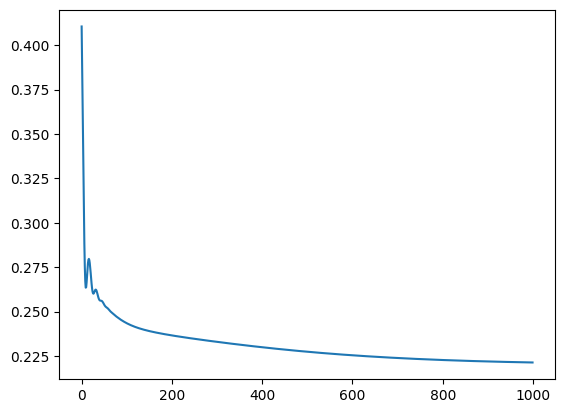

In [11]:
plt.plot(range(0,1000), losses)
plt.show()